In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("survey.csv")

In [3]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [4]:
df_clean = df.drop(columns=['Timestamp', 'comments', 'state'])
df_clean = df_clean.dropna()
df_clean

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
20,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31,male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No
23,41,Male,United States,No,No,Yes,Never,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,29,male,United States,No,Yes,Yes,Sometimes,100-500,Yes,Yes,...,Yes,Don't know,Yes,No,Some of them,No,No,Maybe,No,No
1253,36,Male,United States,No,Yes,No,Rarely,More than 1000,No,No,...,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No


In [5]:
df_clean['treatment'] = df_clean['treatment'].map({'Yes': 1, 'No': 0})


In [6]:
label_encoders = {}
for col in df_clean.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

In [7]:
X = df_clean.drop(columns=['treatment'])
y = df_clean['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42, verbosity=0)
}


In [9]:
results = {}


In [10]:
for name, model in models.items():
    pipe = make_pipeline(StandardScaler(), model)
    pipe.fit(X_train, y_train)
    y_pred_proba = pipe.predict(X_test)
    y_pred = (y_pred_proba >= 0.5).astype(int)
    results[name] = {
        'model': model,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba)
    }

In [11]:
for name, res in results.items():
    print(f"{name}:")
    for metric in ['Accuracy', 'F1 Score', 'ROC AUC']:
        print(f"  {metric}: {res[metric]:.4f}")
    print()

Logistic Regression:
  Accuracy: 0.7857
  F1 Score: 0.8456
  ROC AUC: 0.7360

Random Forest Regressor:
  Accuracy: 0.8010
  F1 Score: 0.8592
  ROC AUC: 0.8380

Gradient Boosting Regressor:
  Accuracy: 0.8214
  F1 Score: 0.8727
  ROC AUC: 0.8601

XGBoost Regressor:
  Accuracy: 0.7092
  F1 Score: 0.7799
  ROC AUC: 0.7711



C:\Users\adity\AppData\Local\Temp\ipykernel_13788\3025830935.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='coolwarm')


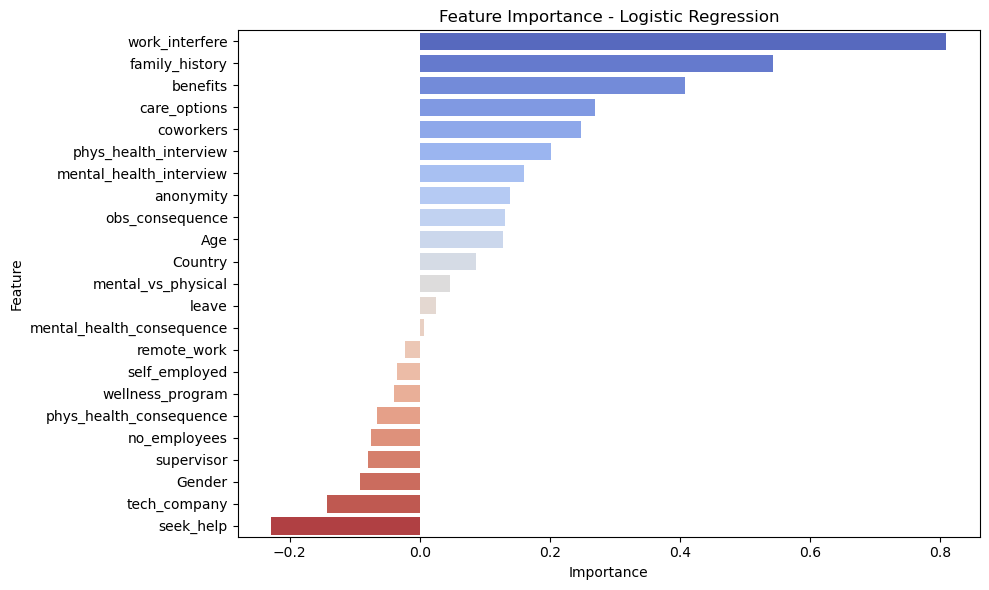

C:\Users\adity\AppData\Local\Temp\ipykernel_13788\3025830935.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='coolwarm')


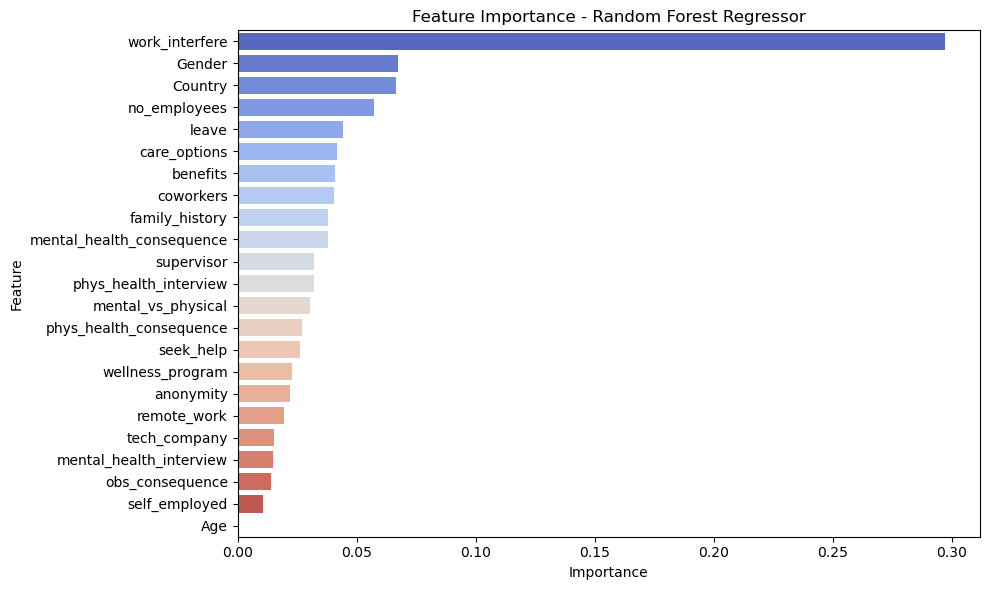

C:\Users\adity\AppData\Local\Temp\ipykernel_13788\3025830935.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='coolwarm')


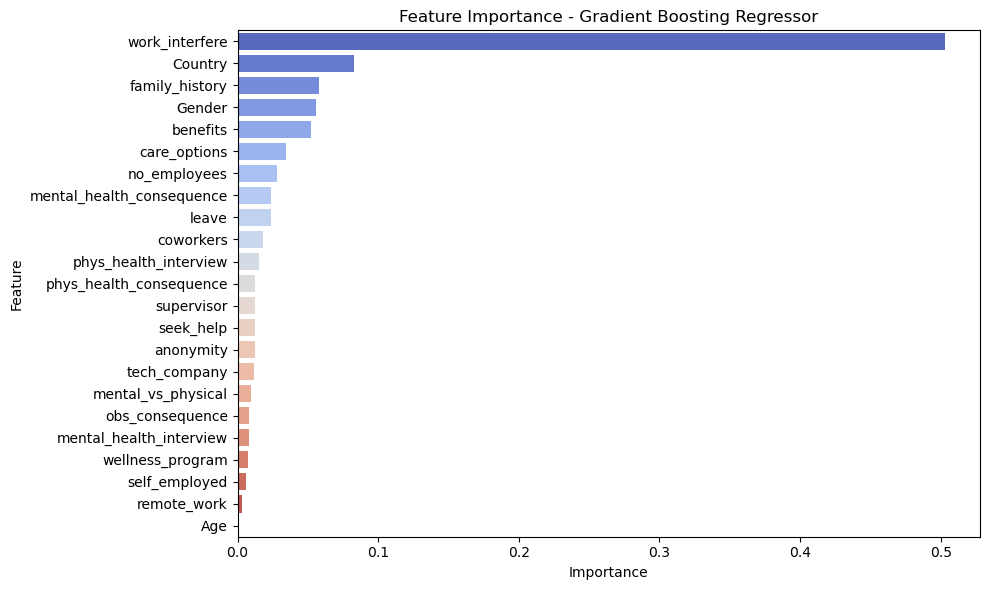

C:\Users\adity\AppData\Local\Temp\ipykernel_13788\3025830935.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='coolwarm')


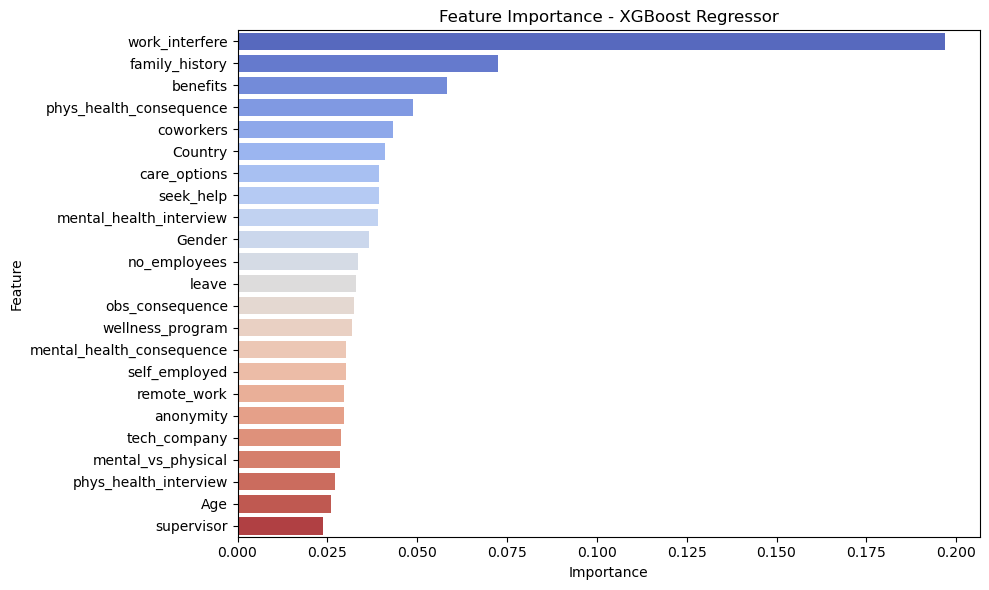

In [12]:
# Corrected: Define plot_importances to accept 3 arguments
def plot_importances(fitted_model, model_name, features):
    if model_name == 'Logistic Regression':
        coefs = fitted_model.named_steps['logisticregression'].coef_[0]
        importances = coefs
    elif model_name == 'Random Forest Regressor':
        importances = fitted_model.named_steps['randomforestregressor'].feature_importances_
    elif model_name == 'Gradient Boosting Regressor':
        importances = fitted_model.named_steps['gradientboostingregressor'].feature_importances_
    elif model_name == 'XGBoost Regressor':
        importances = fitted_model.named_steps['xgbregressor'].feature_importances_
    else:
        raise ValueError(f"Unknown model name: {model_name}")

    # Create and plot feature importance
    feat_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_df, x='Importance', y='Feature', palette='coolwarm')
    plt.title(f'Feature Importance - {model_name}')
    plt.tight_layout()
    plt.show()

# Train and plot for each model
for name, model in models.items():
    pipe = make_pipeline(StandardScaler(), model)
    pipe.fit(X_train, y_train)
    results[name]['pipeline'] = pipe
    plot_importances(pipe, name, X.columns)
